# Collaboration and Competition

---


#### 1. Import Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from unityagents import UnityEnvironment
from ddpg_agent import Agent

#### 2. make environment and check some envrionment's attributes

In [2]:
env = UnityEnvironment(file_name="Tennis.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


#### 3. define train() method for train agent.

In [3]:
def train(n_episodes=5000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores_avg = []
    max_avg, max_score = 0, 0
    solved = False
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(num_agents)

        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break

        score = np.max(scores)
        scores_avg.append(score)
        scores_deque.append(score)
        avg = np.mean(scores_deque)
        max_score, max_avg = max(score, max_score), max(avg, max_avg)
        print('\rEpisode {}\tEpisode Score: {:.2f}\tAverage Score: {:.2f}\tMax Score: {:.2f}\tMax Average Score: {:.2f}'.format(i_episode, score, avg, max_score, max_avg), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tEpisode Score: {:.2f}\tAverage Score: {:.2f}\tMax Score: {:.2f}\tMax Average Score: {:.2f}'.format(i_episode, score, avg, max_score, max_avg), end="")
        if avg >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, avg))
            torch.save(agent.actor_local.state_dict(), '../weight/checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), '../weight/checkpoint_critic.pth')
            solved = True
            break

    return scores_avg, max_score, max_avg, solved

#### 4. train the agent and plot the result.
- agent's weight is saved in `../weight/checkpoint_actor.pth`, `../weight/checkpoint_critic.pth`

In [4]:
n_agents = 2
lr_actor, lr_critic = 1e-3, 1e-3
fc1_units, fc2_units = 128, 128

agent = Agent(state_size, action_size, random_seed=0, n_agents=2, lr_actor=lr_actor,
              lr_critic=lr_critic, fc1_unit=fc1_units, fc2_unit=fc2_units)
scores_avg, max_score, max_avg, solved = train()

D:\miniconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 4	Episode Score: 0.00	Average Score: 0.00	Max Score: 0.00	Max Average Score: 0.00

D:\Udacity\p3_collab-compet\code\ddpg_agent.py:116: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 2525	Episode Score: 2.60	Average Score: 0.51	Max Score: 2.60	Max Average Score: 0.51
Environment solved in 2525 episodes!	Average Score: 0.51


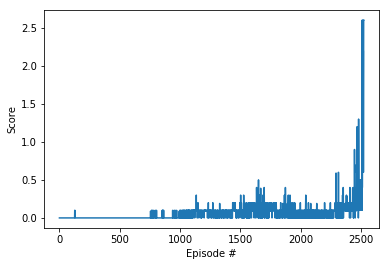

In [5]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_avg)), scores_avg)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#### 6. close the environment

In [6]:
env.close()